# Operation Mind Shield: Decoding Alzheimer's
#### **Full Name:** Olivia Hinson
#### **Link to SDS Profile:** https://community.superdatascience.com/u/0c9f4b64

---

**Project Objective**

The ultimate goal is to build and deploy a predictive model that can accurately distinguish between patients with and without Alzheimer’s, potentially paving the way for early diagnosis and improved patient outcomes.

**Mission Brief**

In this mission, you will work with a highly sensitive dataset containing crucial information about patients who may or may not be afflicted with Alzheimer’s disease. Your task is to analyze this data and develop a predictive model, with the complexity of your mission depending on the level of difficulty you choose.

---

## Assignment 2: The Specialist - Intermediate Level

You’ve proven yourself, Agent. Now, it’s time to take on more complex challenges. As a Specialist, you’ll need to dive deeper into the data and utilize more advanced techniques to build a robust predictive model. This assignment is for those with a solid foundation in data science, looking to sharpen their skills.

**Data Cleaning & Feature Selection**: Engage in a more elaborate data cleaning process. This includes handling outliers, imputing missing data with advanced techniques, and conducting a single step of feature selection to enhance your model’s performance.

**Model Building**: Move beyond the basics and build more sophisticated models, such as Gradient Boosting Machines or Random Forests. Incorporate some hyperparameter tuning to refine your model.

**Evaluation**: Evaluate your model using k-fold cross-validation to ensure its robustness across different subsets of the data. Your mission is to strike a balance between complexity and performance.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Store CSV file in variable 
data = r'..\..\data\alzheimers_disease_data.csv'
# Read CSV file in pandas dataframe 
df = pd.read_csv(data)

In [6]:
# Set options to view all columns instead of truncating columns
pd.set_option('display.max_columns', None)

# Print dataframe to confirm successful loading
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


### 1. Data Cleaning

#### Check for correct data types

In [10]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Some columns might need to be converted to categorical/object data type, but will hold off for now

#### Remove Any NULL and Duplicate Values

In [13]:
# Check for missing values 
print(df.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [15]:
# Check for duplicate entries
df[df.duplicated()]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge


There doesn't appear to be any NULL or duplicate values. Let's continue with analysis

#### Remove Columns To Avoid Any Biases and Imbalance

We now want to remove some variables from the dataframe that deals with the actual onset of Alzheimer's

To build a reliable and fair alzheimer's prediction model, it's essential to remove columns that could lead to information leakage. This happens when we include data that wouldn't be available at prediction time, like Family History for Alzheime's or Functional Assessments. By excluding these columns, our model learns from valid predictive features, ensuring it performs accurately in real-world scenarios.

In [23]:
# List all columns 
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [25]:
# Will have information leakage from the following columns
# These columns are removed due to knowing the answer to "Does a person have alzheimer's or not?"
# We want to make sure that the answer isn't available at prediction time, making sure model learns from valid predictive features 
df.drop(['PatientID', 'FamilyHistoryAlzheimers', 'MMSE', 'FunctionalAssessment', 'ADL', 'DoctorInCharge'], axis=1, inplace=True)

print("Columns remaining: ", df.shape[1])

Columns remaining:  30


In [32]:
# View all data again after dropping a few columns
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,0,0,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,0,0,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,0,0,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,0,1,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,0,0,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,0,1,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,0,0,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,0,0,0,0,0,0,1,1


### 2. Exploratory Data Analysis (EDA)

#### How many people were diagnosed with Alzheimer's? 

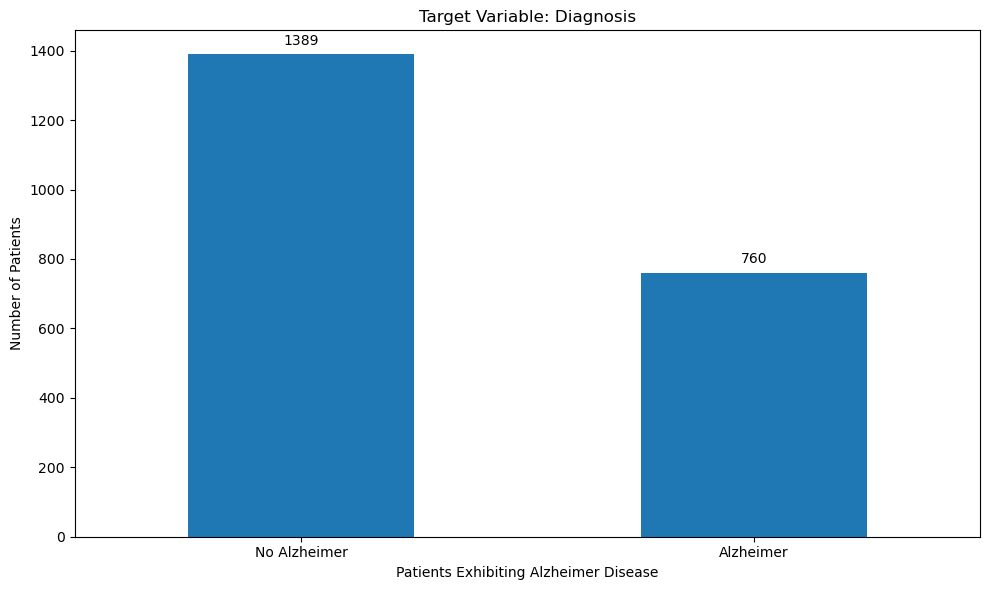

Diagnosis
0    64.634714
1    35.365286
Name: count, dtype: float64


In [46]:
# Count the occurrences of flight delays
alzheimer_counts = df['Diagnosis'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = alzheimer_counts.plot(kind='bar')

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.xlabel('Patients Exhibiting Alzheimer Disease')
plt.ylabel('Number of Patients')
plt.title('Target Variable: Diagnosis')
plt.xticks(ticks=[0, 1], rotation=0, labels=['No Alzheimer', 'Alzheimer'], ha='center')  # Rotate x-axis labels for better visibility and define labels 
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

print((df['Diagnosis'].value_counts()/df.shape[0]) * 100)

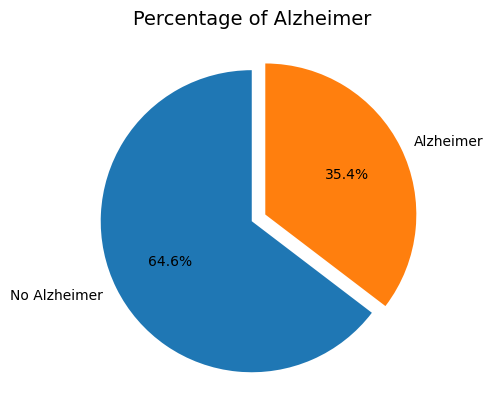

In [52]:
# Visualizing Alzheimer Disease Percentage

# Extract total number of on time and delayed flights
no_alzheimer, alzheimer = df['Diagnosis'].value_counts()

# Data and Labels
data = [no_alzheimer, alzheimer]
keys = ['No Alzheimer', 'Alzheimer']

# Pie Chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    data,
    labels=keys,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0.1]
)

# Adjusting Figure Size
fig.set_size_inches(5, 5)

# Title and Layout Adjustments
plt.title('Percentage of Alzheimer', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

Key Observations

**Class Distribution**
- No Alzheimer (0): The pie chart shows that **64.6%**, or **1,389**, of patients in the dataset do not have Alzheimer's disease
- Alzheimer (1): The pie chart shows that **35.4%**, or **760**, of patients in the dataset have Alzheimer's disease

**Class Imbalance**
- This dataset is clearly imbalanced. There are significantly more pateints (64.6%) that do not have Alzheimer's disease comapred to those that do have it (35.4%)
- This imbalance could impact how our predictive model distinguishes between patients with and without Alzheimer's, meaning it would create bias within the data to make our model lean more towards one outcome than another
- Our model needs to have an equally distributed number of classes to ensure accurate predictions and less bias
- Later down the line, we need to consider some techniques for creating a balanced dataset, such as oversampling the minority class (e.g., using SMOTE), downsampling the majority class to match the minority class, or applying class weighting to handle this imbalance effectively

#### What kind of distribution does Age present? 

C:\Users\ohins\anaconda3\envs\Python3_12_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


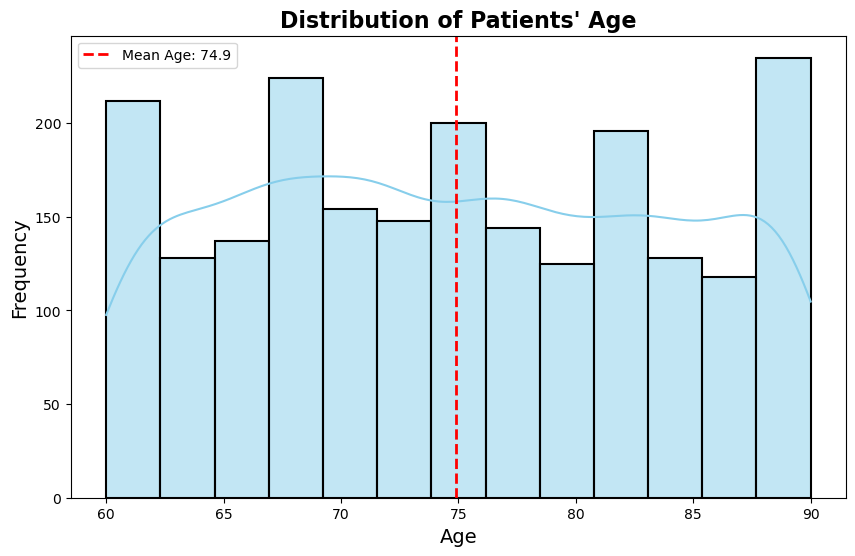

In [57]:
# Create a histogram with KDE (Kernel Density Estimate) for the Age distribution
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
sns.histplot(df['Age'], kde=True, color='skyblue', edgecolor='black', linewidth=1.5)

# Add title and labels with improved formatting
plt.title('Distribution of Patients\' Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Highlight the mean age with a vertical line
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.1f}')

# Add a legend for the mean age line
plt.legend()

# Display the plot
plt.grid(False)
plt.show()

Key Observations

**Age Distribution**
- The distribution for Age appears uniform, with patients distributed evenly from 60 to 90 years
- There are several high frequency Age groups within the dataset (60, 70, 75, and 90)

**Mean Age**
- The mean age for the patients is 74.9, as shown by the vertical red line
- This is a reference point to understand where the central tendency lies in relation to the overall distribution
- The age is slightly closer to the middle, which might indicate the data is slightly skewed towards younger or older patients but not significatntly

 